### Question 1

In [11]:
from sklearn.datasets import fetch_20newsgroups

import numpy as np
np.random.seed(42)
import random
random.seed(42)

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
labels_actual = dataset.target

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
countVect = CountVectorizer(min_df=3,stop_words='english')

dataCount = countVect.fit_transform(dataset.data)        # document-term matrix
data_tfidf = tfidf_transformer.fit_transform(dataCount)  # tf-idf matrix

print('\nShape of TF-IDF matrix:')
print('Data TF-IDF Shape: ',data_tfidf.shape)


Shape of TF-IDF matrix:
Data TF-IDF Shape:  (7882, 27768)


### Question 2

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/0.18/auto_examples/text/document_clustering.html

In [10]:
from sklearn.cluster import KMeans

# apply K-means clustering on the TF-IDF data
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(data_tfidf)

print("Clustering sparse data with %s" % kmeans)

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


In [16]:
from sklearn.metrics.cluster import contingency_matrix

print("Kmeans Clustering Contingency Matrix: TF-IDF Matrix")
contingency_matrix(labels_actual, kmeans.labels_)

Kmeans Clustering Contingency Matrix: TF-IDF Matrix


array([[  1, 972],
       [  0, 985],
       [  3, 979],
       [  0, 963],
       [  1, 989],
       [  1, 995],
       [794, 200],
       [922,  77]])

### Question 3

In [12]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

def evalCluster(labels_true, labels_pred):
    print("Homogeneity: %0.3f" % homogeneity_score(labels_true, labels_pred))
    print("Completeness: %0.3f" % completeness_score(labels_true, labels_pred))
    print("V-measure: %0.3f" % v_measure_score(labels_true, labels_pred))
    print("Adjusted Rand-Index: %0.3f" % adjusted_rand_score(labels_true, labels_pred))
    print("Adjusted Mutual Info: %0.3f" % adjusted_mutual_info_score(labels_true, labels_pred))

print("Kmeans Clustering Measures: TF-IDF Matrix")    
evalCluster(labels_actual, kmeans.labels_)

Kmeans Clustering Measures: TF-IDF Matrix
Homogeneity: 0.203
Completeness: 0.803
V-measure: 0.324
Adjusted Rand-Index: 0.113
Adjusted Mutual Info: 0.203


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Question 4

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [45]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000)   # shortcut for obtaining r=1 to 1000
                                        
dataLSIReduced = svd.fit(data_tfidf)
percentVar = svd.explained_variance_ratio_     # array of % variance for r=1 to 1000

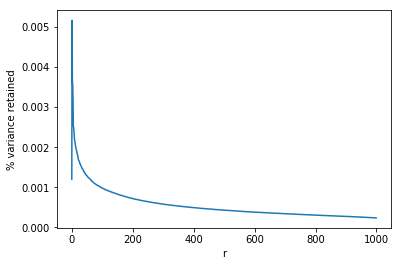

In [46]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# plot of the percent of variance the top r principle components can retain vs. r, for r = 1 to 1000
plt.plot(percentVar)
plt.xlabel('r')
plt.ylabel('% variance retained')
plt.show()